<a href="https://colab.research.google.com/github/Ebl14/senales_y_sistemas/blob/main/parcial_1se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Se tiene un microprocesador de 5 bits con entrada analoga de -3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalizacion para la señal:  x(t) = 20 sin(7t−π/2)−3 cos(5t)+2 cos(10t). Presente las simulaciones y graficas de los procedimientos mas representativos en un cuaderno de Python, incluyendo al menos dos periodos de la senal estudiada

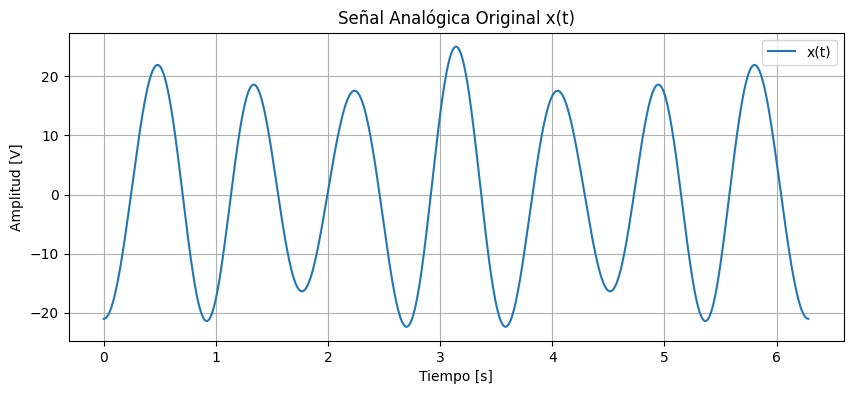

Rango original de x(t): -22.34 V a 24.99 V


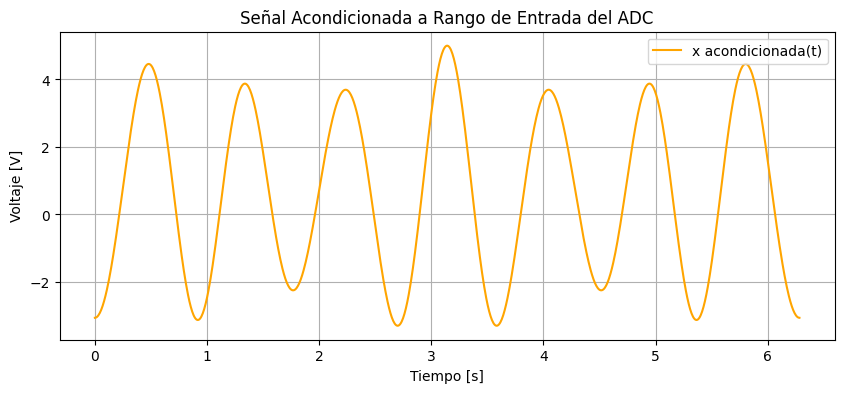

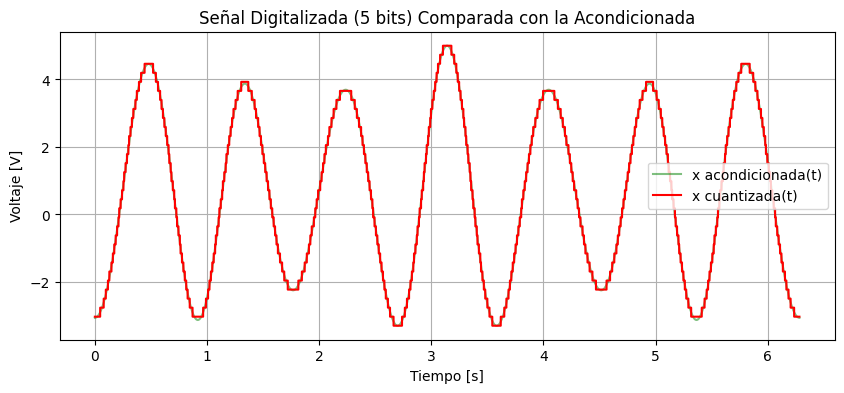

In [6]:
# Importamos las librerías necesarias
import numpy as np #importación para operaciones númericas
import matplotlib.pyplot as plt #importación para graficar

# 1. Definimos la señal original x(t)
# Esta función representa la señal analógica antes del acondicionamiento
def x(t):
    return 20 * np.sin(7 * t - np.pi / 2) - 3 * np.cos(5 * t) + 2 * np.cos(10 * t)# se crea una señal compuesta por 3 componentes
    # 20*sin(7t - π/2): Onda seno de amplitud 20, frecuencia 7 rad/s y desfase -π/2
    # -3*cos(5t): Onda coseno de amplitud 3 (invertida) y frecuencia 5 rad/s
    # 2*cos(10t): Onda coseno de amplitud 2 y frecuencia 10 rad/s

# 2. Creamos el vector de tiempo: dos periodos de la frecuencia fundamental
# La frecuencia fundamental se obtiene del menor múltiplo común de las frecuencias 7, 5 y 10 rad/s
# El período fundamental será 2π / mcd(7, 5, 10) = 2π
T = 2 * np.pi
t = np.linspace(0, T, 1000) #se generan una secuencia ordenanda de numeros entre el 0 y el T la cantidad de estos esta definida por el numero final en este caso es 1000  # vector de tiempo para dos períodos con buena resolución, 0 y T es el rango de
# T: Período fundamental calculado como 2π (máximo común divisor de las frecuencias)

# t: Vector de tiempo que cubre dos períodos con 1000 puntos para buena resolución

# 3. Evaluamos la señal
xt = x(t) #es el puente entre la señal analógica (matemática) y su representación digital

# 4. Graficamos la señal original
plt.figure(figsize=(10, 4)) # Crea una figura de 10 pulgadas de ancho x 4 de alto
plt.plot(t, xt, label='x(t)') # Grafica la señal original
plt.title('Señal Analógica Original x(t)') # Título del gráfico
plt.xlabel('Tiempo [s]') # Etiqueta del eje x
plt.ylabel('Amplitud [V]') # Etiqueta del eje y
plt.grid(True) # Habilita la cuadrícula
plt.legend() # Muestra la leyenda
plt.show() # Muestra el gráfico

# 5. Calculamos los valores máximo y mínimo para diseñar el acondicionador
x_max = np.max(xt) # Encuentra el valor máximo de la señal
x_min = np.min(xt) # Encuentra el valor mínimo de la señal
print(f"Rango original de x(t): {x_min:.2f} V a {x_max:.2f} V") # Imprime el rango dinámico

# 6. Acondicionamiento: mapeamos de [x_min, x_max] a [-3.3, 5]
# La fórmula es: x_scaled = (x - x_min) * (target_max - target_min)/(x_max - x_min) + target_min

target_min = -3.3 # Valor mínimo objetivo para el acondicionamiento
target_max = 5 # Valor máximo objetivo para el acondicionamiento

# Función para escalar la señal
def acondicionar(x_signal): # Escala linealmente la señal
    return (x_signal - x_min) * (target_max - target_min) / (x_max - x_min) + target_min

x_acond = acondicionar(xt) # Señal acondicionada en el nuevo rango de voltaje

# 7. Graficamos la señal acondicionada
plt.figure(figsize=(10, 4)) # Crea nueva figura
plt.plot(t, x_acond, label='x acondicionada(t)', color='orange') # Grafica señal acondicionada
plt.title('Señal Acondicionada a Rango de Entrada del ADC') # Título
plt.xlabel('Tiempo [s]') # Etiqueta eje x
plt.ylabel('Voltaje [V]') # Etiqueta eje y
plt.grid(True) # Cuadrícula
plt.legend() # Leyenda
plt.show() # Muestra gráfico

# 8. Digitalización (Cuantización): 5 bits → 2^5 = 32 niveles
n_bits = 5 # Número de bits del ADC
niveles = 2 ** n_bits # Calcula el número de niveles de cuantización (32 para 5 bits)
resolucion = (target_max - target_min) / (niveles - 1) # Calcula la resolución del ADC
# Cuantizamos la señal acondicionada
x_digital = np.round((x_acond - target_min) / resolucion)# Aplica redondeo para cuantizar

# 9. Reconstruimos la señal digital (niveles de tensión)
x_cuantizada = x_digital * resolucion + target_min # Convierte niveles digitales a voltajes

# 10. Graficamos señal digitalizada vs acondicionada
plt.figure(figsize=(10, 4)) # Crea nueva figura
plt.plot(t, x_acond, label='x acondicionada(t)', color='green', alpha=0.5) # Señal analógica
plt.step(t, x_cuantizada, label='x cuantizada(t)', color='red', where='mid') # Señal digital
plt.title('Señal Digitalizada (5 bits) Comparada con la Acondicionada') # Título
plt.xlabel('Tiempo [s]') # Etiqueta eje x
plt.ylabel('Voltaje [V]') # Etiqueta eje y
plt.grid(True) # Cuadrícula
plt.legend() # Leyenda
plt.show() # Muestra gráfico




2. Cual es la señal obtenida en tiempo discreto al utilizar
un conversor analogo digital con frecuencia de muestreo
de 5kHz, aplicado a la señal  x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)?. Realizar la simulacion
del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor
adecuado para la señal estudiada.

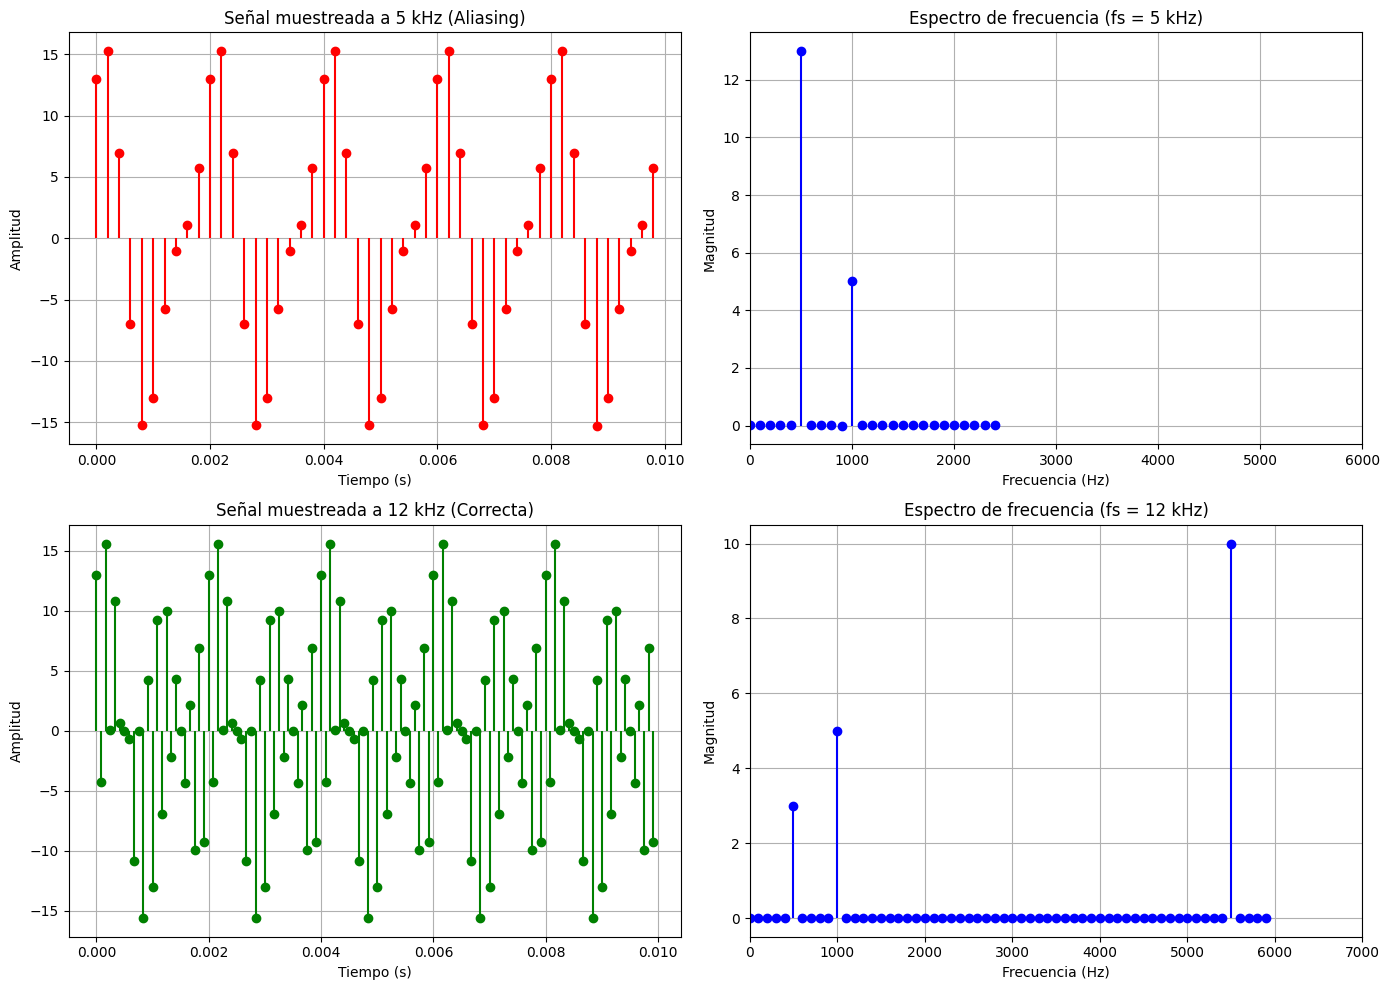

In [13]:
from typing import TextIO
# Importación de librerías necesarias
import numpy as np                  # Importa la librería NumPy, esencial para realizar operaciones numéricas eficientes
import matplotlib.pyplot as plt         # Importa la librería Matplotlib, específicamente el submódulo 'pyplot', que proporciona herramientas para la creación de gráficos y visualizaciones en Python. Se le asigna el alias 'plt'.
from scipy.fft import fft, fftfreq     # Importa funciones específicas del módulo 'fft' dentro de la librería SciPy.
# 'fft': Implementa el algoritmo de la Transformada Rápida de Fourier (FFT), una forma eficiente de calcular la Transformada de Fourier Discreta (DFT).
# 'fftfreq': Genera las frecuencias correspondientes a los coeficientes de la FFT.
vm=1000*np.pi
T = 2*np.pi/vm
# PARTE 1: Generación de señal continua

# Vector de tiempo continuo:
# np.linspace(inicio, fin, número_de_puntos) genera un array de números espaciados uniformemente
# en el intervalo [0, 0.01] segundos, incluyendo ambos extremos. Se crean 1000 puntos en este intervalo.
t = np.linspace(0, 2*T, 1000)

# Definición de la señal compuesta x(t):
# Esta señal es la suma de tres componentes sinusoidales con diferentes frecuencias y amplitudes.
# Primer término: 3 * np.cos(1000 * np.pi * t)
#   - Amplitud: 3
#   - Frecuencia angular: 1000π radianes por segundo
#   - Frecuencia en Hz: ω / (2π) = 1000π / (2π) = 500 Hz
# Segundo término: 5 * np.sin(2000 * np.pi * t)
#   - Amplitud: 5
#   - Frecuencia angular: 2000π radianes por segundo
#   - Frecuencia en Hz: ω / (2π) = 2000π / (2π) = 1000 Hz
# Tercer término: 10 * np.cos(11000 * np.pi * t)
#   - Amplitud: 10
#   - Frecuencia angular: 11000π radianes por segundo
#   - Frecuencia en Hz: ω / (2π) = 11000π / (2π) = 5500 Hz
x_t = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# PARTE 2: Muestreo con fs = 5 kHz (con aliasing)

# Frecuencia de muestreo (fs1):
# Se define una frecuencia de muestreo de 5000 Hz (5 kHz).
fs1 = 5000
# Periodo de muestreo (Ts1):
# El periodo de muestreo es el inverso de la frecuencia de muestreo (Ts = 1/fs).
Ts1 = 1 / fs1
# Vector de instantes de muestreo (n1):
# np.arange(inicio, fin, paso) genera un array de valores espaciados uniformemente dentro de un intervalo.
# Aquí, se generan los instantes en los que se toma la muestra, desde 0 hasta (pero sin incluir) 0.01 segundos,
# con un paso igual al periodo de muestreo Ts1.
n1 = np.arange(0, 0.01, Ts1)

# Señal muestreada a 5 kHz (x_n1):
# Se evalúa la señal continua x_t en los instantes de muestreo definidos en n1.
# Es importante notar que la frecuencia de muestreo de 5 kHz es menor que el doble de la frecuencia más alta
# presente en la señal original (2 * 5500 Hz = 11000 Hz), lo que provocará el fenómeno de aliasing.
x_n1 = 3 * np.cos(1000 * np.pi * n1) + 5 * np.sin(2000 * np.pi * n1) + 10 * np.cos(11000 * np.pi * n1)

# Cálculo de la Transformada Rápida de Fourier (FFT) de la señal muestreada a 5 kHz:
# N1: Número de muestras en la señal muestreada x_n1.
N1 = len(x_n1)
# X_f1: Calcula la FFT de la señal muestreada. El resultado es un array de números complejos
#       que representan las componentes de frecuencia de la señal.
X_f1 = fft(x_n1)
# freqs1: Genera las frecuencias correspondientes a los coeficientes de la FFT.
#         fftfreq(n, d) devuelve un array de frecuencias. 'n' es el número de puntos (N1),
#         y 'd' es el espaciamiento entre muestras (Ts1).
#         [:N1//2]: Se toma solo la primera mitad del espectro, que corresponde a las frecuencias positivas
#                   (la segunda mitad es el conjugado complejo de la primera para señales reales).
freqs1 = fftfreq(N1, Ts1)[:N1//2]
# spectrum1: Calcula la magnitud del espectro de frecuencia.
#            np.abs(X_f1[:N1//2]): Obtiene el valor absoluto (magnitud) de los coeficientes de frecuencia positivos.
#            2/N1 * ... : Normaliza la magnitud del espectro para obtener las amplitudes correctas de las componentes sinusoidales.
#                         El factor 2 se aplica porque solo estamos considerando la mitad del espectro (frecuencias positivas).
spectrum1 = 2/N1 * np.abs(X_f1[:N1//2])

# PARTE 3: Muestreo con fs = 12 kHz (correcto, sin aliasing)

# Frecuencia de muestreo (fs2):
# Se define una frecuencia de muestreo de 12000 Hz (12 kHz).
fs2 = 12000
# Periodo de muestreo (Ts2):
# El periodo de muestreo es el inverso de la frecuencia de muestreo.
Ts2 = 1 / fs2
# Vector de instantes de muestreo (n2):
# Se generan los instantes de muestreo desde 0 hasta (sin incluir) 0.01 segundos,
# con un paso igual al periodo de muestreo Ts2.
n2 = np.arange(0, 0.01, Ts2)

# Señal muestreada a 12 kHz (x_n2):
# Se evalúa la señal continua x_t en los instantes de muestreo definidos en n2.
# La frecuencia de muestreo de 12 kHz es mayor que el doble de la frecuencia más alta
# presente en la señal original (11 kHz), cumpliendo con el criterio de Nyquist-Shannon
# y evitando el aliasing.
x_n2 = 3 * np.cos(1000 * np.pi * n2) + 5 * np.sin(2000 * np.pi * n2) + 10 * np.cos(11000 * np.pi * n2)

# Cálculo de la Transformada Rápida de Fourier (FFT) de la señal muestreada a 12 kHz:
# N2: Número de muestras en la señal muestreada x_n2.
N2 = len(x_n2)
# X_f2: Calcula la FFT de la señal muestreada.
X_f2 = fft(x_n2)
# freqs2: Genera las frecuencias correspondientes a los coeficientes de la FFT para la señal muestreada a 12 kHz.
freqs2 = fftfreq(N2, Ts2)[:N2//2]
# spectrum2: Calcula la magnitud del espectro de frecuencia para la señal muestreada a 12 kHz.
spectrum2 = 2/N2 * np.abs(X_f2[:N2//2])


# PARTE 4: Visualización de resultados

# Creación de la figura para los gráficos:
# plt.figure(figsize=(ancho_en_pulgadas, alto_en_pulgadas)) define el tamaño de la ventana de la figura.
plt.figure(figsize=(14, 10))

# Subplot 1: Señal en el tiempo muestreada a 5 kHz ---
# plt.subplot(filas, columnas, índice) crea un conjunto de subgráficos en una figura.
# Aquí, se crea una cuadrícula de 2x2 (2 filas, 2 columnas) y se selecciona el primer subplot (índice 1).
plt.subplot(2, 2, 1)
# plt.stem(x, y, ...) crea un gráfico de tallos, útil para visualizar señales discretas.
# n1: Los instantes de tiempo de las muestras.
# x_n1: Los valores de la señal en esos instantes.
# linefmt='r-': Formato de la línea de los tallos (rojo, línea continua).
# markerfmt='ro': Formato del marcador en la punta de los tallos (círculo rojo).
# basefmt=' ': Formato de la línea base (sin línea base).
plt.stem(n1, x_n1, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title('Señal muestreada a 5 kHz (Aliasing)') # Título del subplot.
plt.xlabel('Tiempo (s)')                      # Etiqueta del eje x.
plt.ylabel('Amplitud')                     # Etiqueta del eje y.
plt.grid(True)                              # Activa la cuadrícula de fondo.

# Subplot 2: Espectro de la señal muestreada a 5 kHz ---
# Se selecciona el segundo subplot de la cuadrícula 2x2.
plt.subplot(2, 2, 2)
# Se grafica el espectro de frecuencia usando stem.
# freqs1: Las frecuencias correspondientes al espectro.
# spectrum1: La magnitud del espectro en esas frecuencias.
# linefmt='b-': Tallos de color azul y línea continua.
# markerfmt='bo': Marcadores de círculo azul.
# basefmt=' ': Sin línea base.
plt.stem(freqs1, spectrum1, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Espectro de frecuencia (fs = 5 kHz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 6000) # Limita el eje X para mostrar hasta 6 kHz, facilitando la visualización del aliasing.

# Subplot 3: Señal en el tiempo muestreada a 12 kHz ---
# Se selecciona el tercer subplot de la cuadrícula 2x2.
plt.subplot(2, 2, 3)
# Se grafica la señal muestreada a 12 kHz en el dominio del tiempo.
# linefmt='g-': Tallos de color verde y línea continua.
# markerfmt='go': Marcadores de círculo verde.
# basefmt=' ': Sin línea base.
plt.stem(n2, x_n2, linefmt='g-', markerfmt='go', basefmt=' ')
plt.title('Señal muestreada a 12 kHz (Correcta)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Subplot 4: Espectro de la señal muestreada a 12 kHz ---
# Se selecciona el cuarto subplot de la cuadrícula 2x2.
plt.subplot(2, 2, 4)
# Se grafica el espectro de frecuencia de la señal muestreada a 12 kHz.
# linefmt='b-': Tallos de color azul y línea continua.
# markerfmt='bo': Marcadores de círculo azul.
# basefmt=' ': Sin línea base.
plt.stem(freqs2, spectrum2, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Espectro de frecuencia (fs = 12 kHz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 7000) # Limita el eje X para mostrar hasta 7 kHz.

# Ajuste automático del diseño:
# plt.tight_layout() ajusta automáticamente el espaciado entre los subplots para evitar que se superpongan.
plt.tight_layout()
# Mostrar la figura:
# plt.show() muestra la ventana con los gráficos generados.
plt.show()

La distancia media entre dos senales $ x1(t), x2(t) ∈ R, C$, se
puede expresar a partir de la potencia media:

$d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} |x_1(t) - x_2(t)|^2 dt.$

Sean $x1(t)$ y $x2(t)$:

$x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = \frac{2\pi}{T}, \quad T, A \in \mathbb{R}^+$


$x_2(t)$ = \begin{cases}
1 & \text{si } 0 \leq t < \frac{T}{4} \\
-1 & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \text{si } \frac{3T}{4} \leq t < T
\end{cases}

¿Cual es la distancia media entre las señales?. Corrobore sus
desarrollos con Sympy.




In [14]:
import sympy as sp

# Definir variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)

# Definir frecuencia angular
omega0 = 2 * sp.pi / T

# Señal cosenoidal
x1 = A * sp.cos(omega0 * t)

# Señal por tramos x2(t):
# x2(t) = 1 en [0, T/4) y [3T/4, T)
# x2(t) = -1 en [T/4, 3T/4)
# Por tanto, el error cuadrático (x1 - x2)^2 en cada intervalo es:

# Intervalo 1: [0, T/4)
expr1 = (x1 - 1)**2
I1 = sp.integrate(expr1, (t, 0, T/4))

# Intervalo 2: [T/4, 3T/4)
expr2 = (x1 + 1)**2
I2 = sp.integrate(expr2, (t, T/4, 3*T/4))

# Intervalo 3: [3T/4, T)
expr3 = (x1 - 1)**2
I3 = sp.integrate(expr3, (t, 3*T/4, T))

# Sumar los tres tramos y dividir entre el periodo
d = (I1 + I2 + I3) / T

# Simplificar el resultado
d_simplificado = sp.simplify(d)

# Mostrar resultado
sp.pprint(d_simplificado)


 2          
A    4⋅A    
── - ─── + 1
2     π     
